In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
import extcolors 
from collections import Counter 
from skimage.color import rgb2lab, deltaE_cie76
import os 

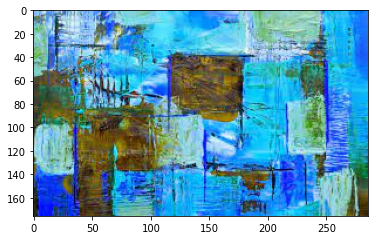

In [2]:
image= cv2.imread('art1.jpg')
image2= cv2.imread('art2.jpg')
plt.imshow(image)

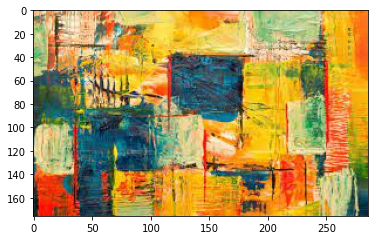

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
print(image.shape)
print(image2.shape)

(176, 286, 3)
(59, 96, 3)


In [5]:
def scale(x):
    if (x>0 and x<0.175):
        return 0.1
    if (x>0.176 and x<0.29):
        return 0.25
    if (x>0.3 and x<0.415):
        return 0.33
    if (x>0.416 and x<0.585):
        return 0.5
    if (x>0.586 and x<0.71):
        return 0.67
    if (x>0.72 and x<0.875):
        return 0.75
    if (x>0.876):
        return 1

In [6]:
orientation = ''
Pixel_Per_Inch = 96
def converterWhenBothAreEqual(image,height,width):
    orientation = 'Square'
    heightInInches = 1
    widthInInches = 1
    return heightInInches,widthInInches,orientation

def converterWhenHeightIsBigger(image,height,width):
    orientation = 'Vertical'
    proportion = height/Pixel_Per_Inch
    height = int(Pixel_Per_Inch)
    width = int(width/proportion)
    
    image_resize = cv2.resize(image,(width,height),interpolation = cv2.INTER_AREA)
    
    heightInInches = height/Pixel_Per_Inch
    widthInInches = width/Pixel_Per_Inch
    widthInInches = scale(widthInInches)
    
    return image_resize,heightInInches,widthInInches,orientation

def converterWhenWidthIsBigger(image,height,width):
    orientation = 'Horizontal'
    proportion = width/Pixel_Per_Inch
    width = int(Pixel_Per_Inch)
    height = int(height/proportion)
    
    image_resize = cv2.resize(image,(width,height),interpolation = cv2.INTER_AREA)
    
    widthInInches = width/Pixel_Per_Inch
    heightInInches = height/Pixel_Per_Inch 
    heightInInches = scale(heightInInches)
    
    return image_resize,heightInInches,widthInInches,orientation

In [7]:
if(image.shape[0]>image.shape[1]):
    i,a,b,c = converterWhenHeightIsBigger(image,image.shape[0],image.shape[1])
    image_resize = i
    print(a,b,c)
else:
    i,a,b,c = converterWhenWidthIsBigger(image,image.shape[0],image.shape[1])
    image_resize = i
    print(a,b,c)

0.67 1.0 Horizontal


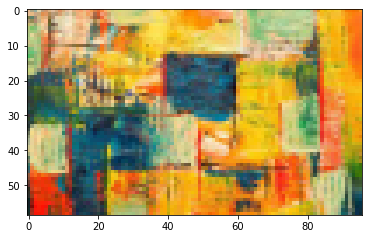

In [8]:
plt.imshow(image_resize)

In [12]:
print(image_resize.shape)    

(59, 96, 3)


In [28]:
modified_image = image_resize.reshape(image_resize.shape[0]*image_resize.shape[1], 3)
print(modified_image.shape)

(5664, 3)


In [16]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [17]:
number_of_colors = 3
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)


counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

In [24]:
print(hex_colors)
print(rgb_colors)

['#3f5b53', '#e09424', '#cdc07f']
[array([63.72180451, 91.28571429, 83.12092732]), array([224.75816453, 148.95039272,  36.07110376]), array([205.89205579, 192.72892662, 127.86597938])]


In [26]:
hex_colors[0]>hex_colors[1]

False